occurtime
2020-12-10 00:00:00     882.56
2020-12-10 01:00:00     873.44
2020-12-10 02:00:00     897.76
2020-12-10 03:00:00    1310.64
2020-12-10 04:00:00    1521.35
Name: power, dtype: float64


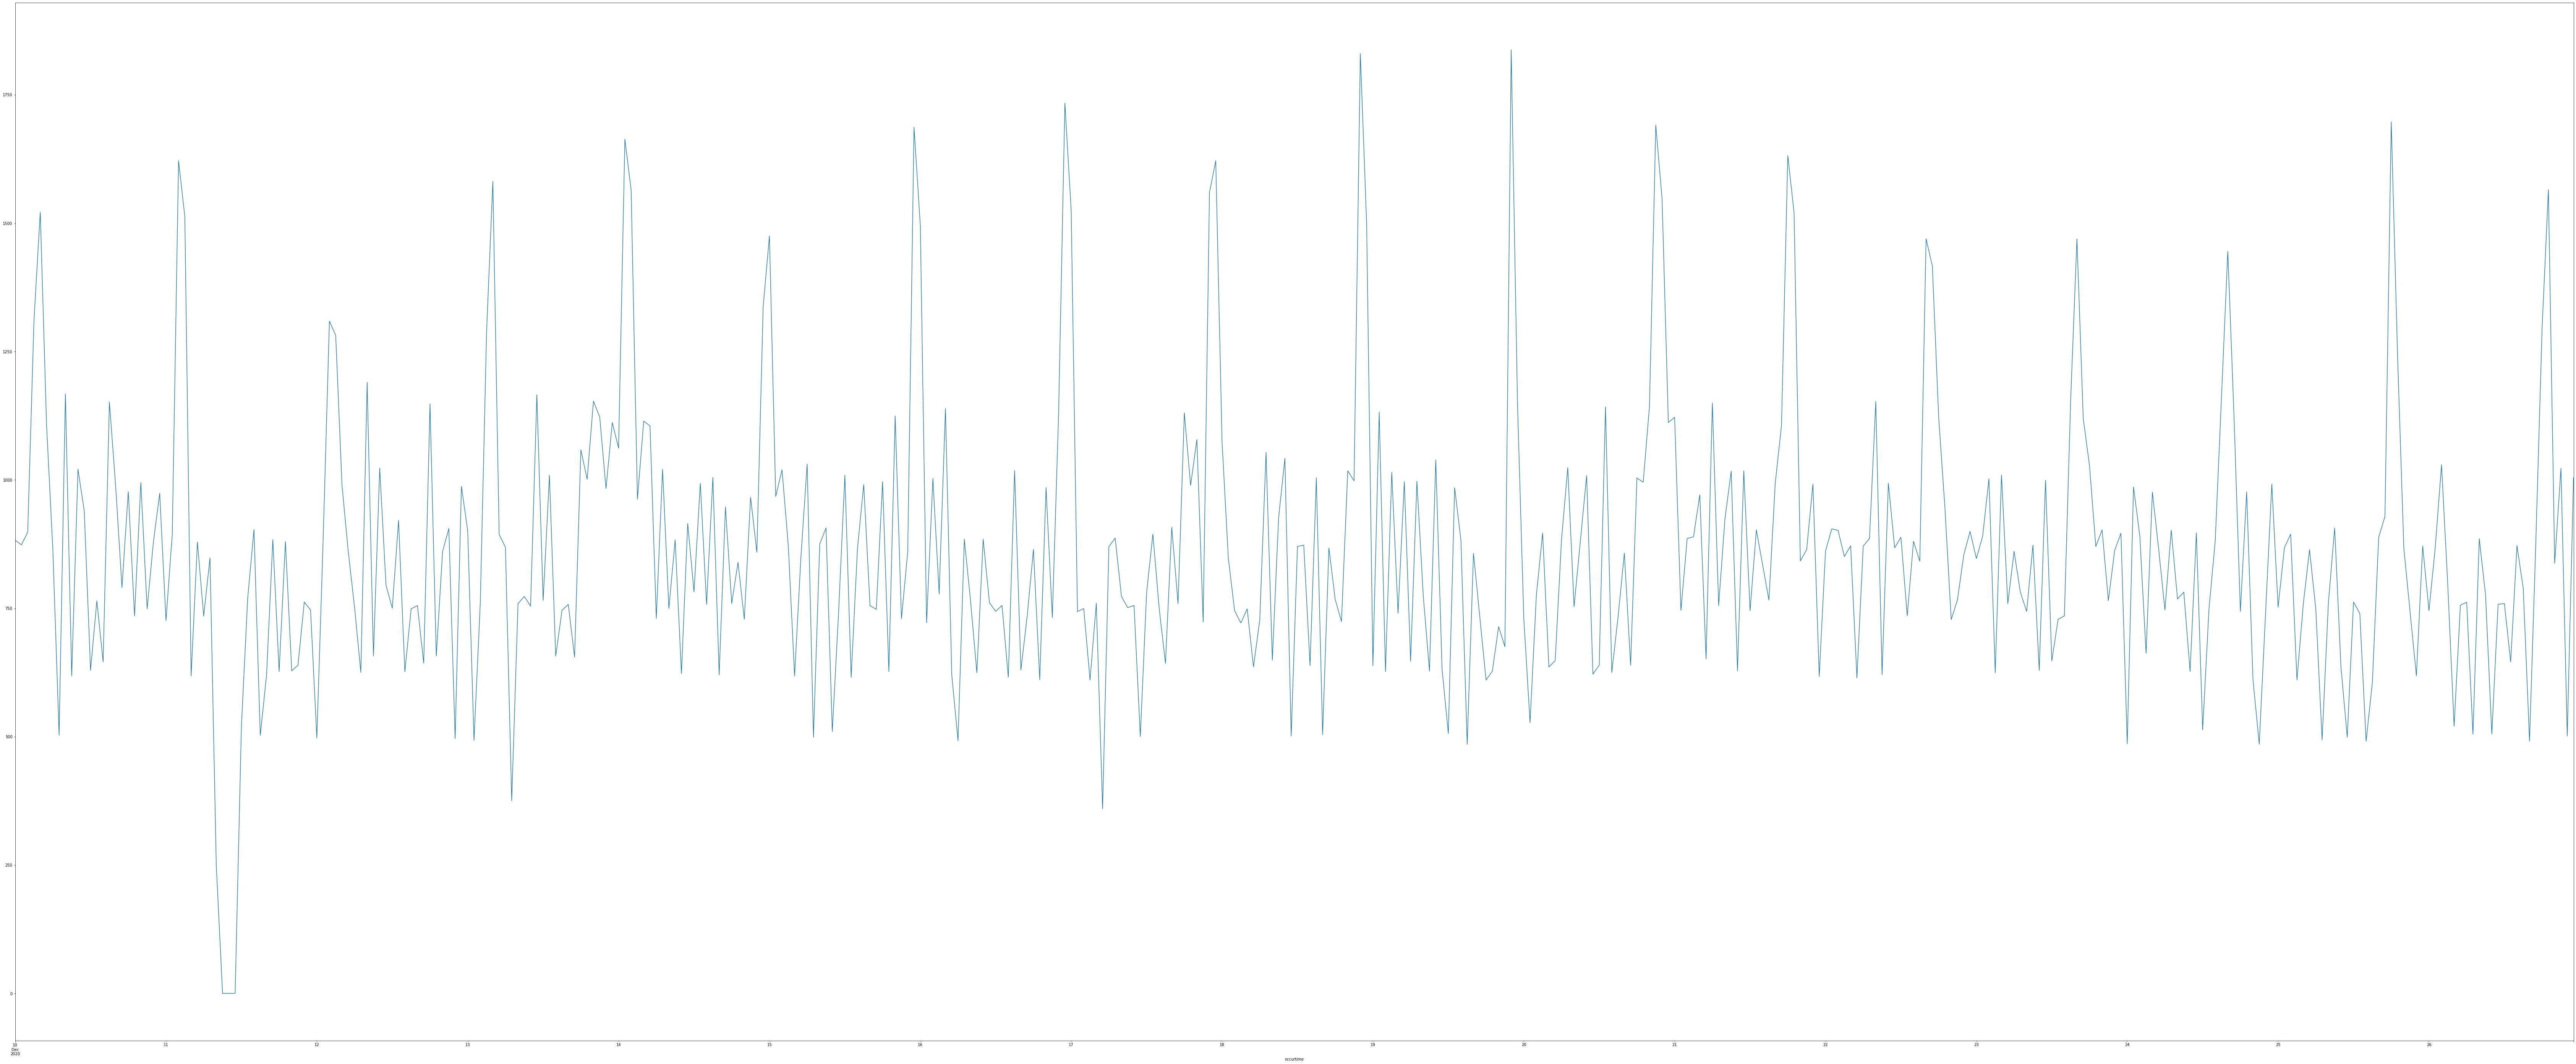

In [27]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
series = read_csv('myfridge-hrs.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

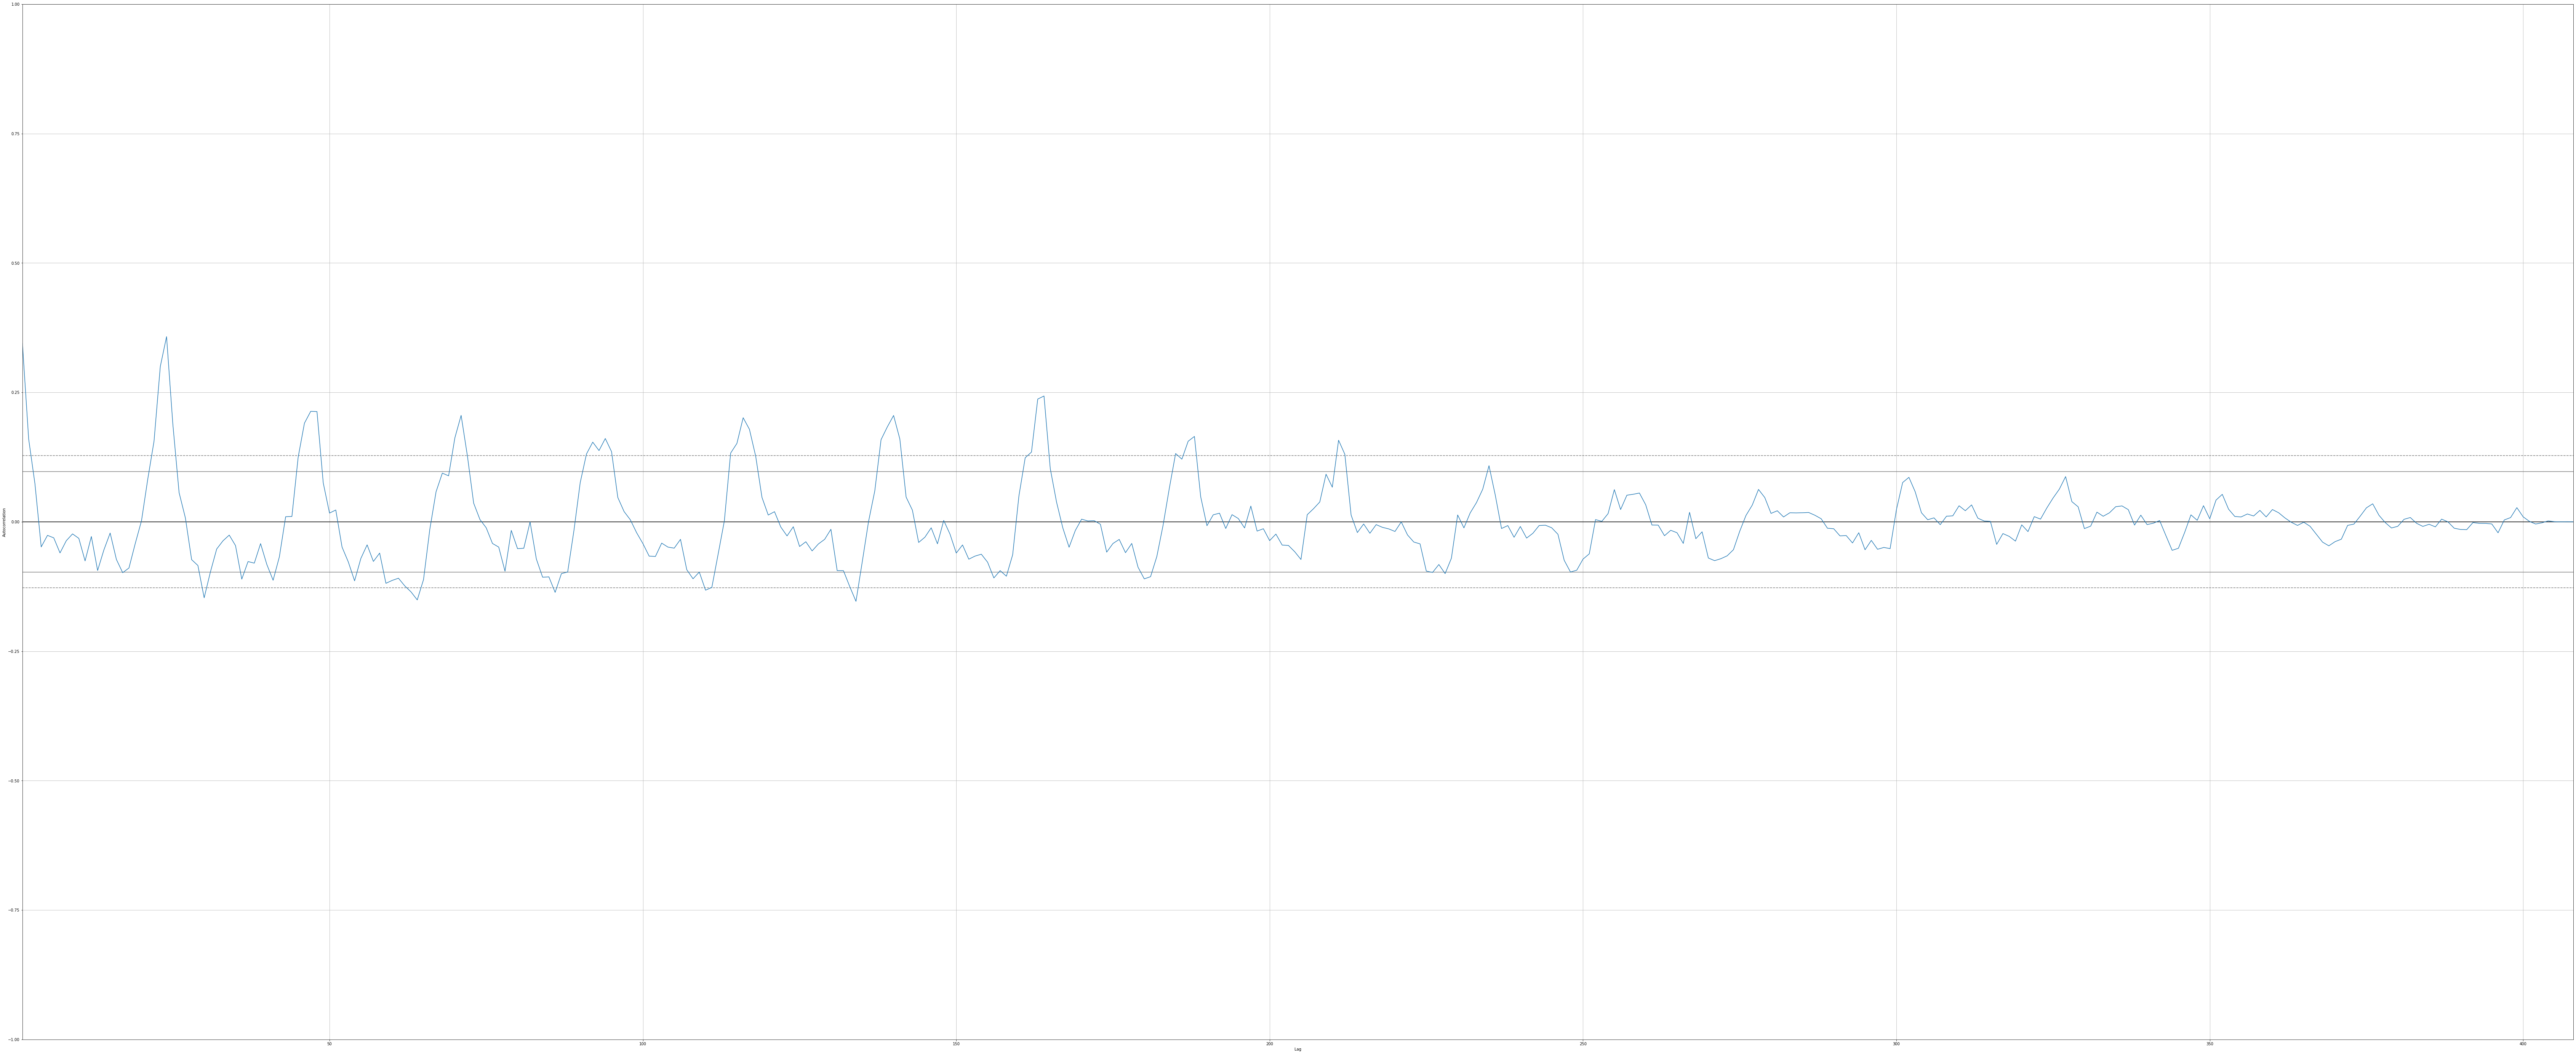

In [30]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
series = read_csv('myfridge-hrs.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

autocorrelation_plot(series) #autocorelation plot
pyplot.show()

In [29]:
import warnings
from math import sqrt
from pandas import read_csv
import statsmodels
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = read_csv('myfridge-hrs.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=234.451
ARIMA(0, 0, 1) RMSE=222.918
ARIMA(0, 0, 2) RMSE=221.027
ARIMA(0, 1, 0) RMSE=269.594
ARIMA(0, 1, 1) RMSE=242.390
ARIMA(0, 1, 2) RMSE=222.920
ARIMA(0, 2, 0) RMSE=438.949
ARIMA(0, 2, 1) RMSE=270.009
ARIMA(0, 2, 2) RMSE=242.814
ARIMA(1, 0, 0) RMSE=221.055
ARIMA(1, 0, 1) RMSE=221.476
ARIMA(1, 0, 2) RMSE=221.539
ARIMA(1, 1, 0) RMSE=253.624
ARIMA(1, 1, 1) RMSE=221.076
ARIMA(1, 1, 2) RMSE=221.546
ARIMA(1, 2, 0) RMSE=348.827
ARIMA(1, 2, 1) RMSE=253.997
ARIMA(1, 2, 2) RMSE=222.567
ARIMA(2, 0, 0) RMSE=221.328
ARIMA(2, 0, 1) RMSE=221.507
ARIMA(2, 0, 2) RMSE=222.146
ARIMA(2, 1, 0) RMSE=250.694
ARIMA(2, 1, 1) RMSE=221.370
ARIMA(2, 1, 2) RMSE=222.086
ARIMA(2, 2, 0) RMSE=318.133
ARIMA(2, 2, 1) RMSE=251.031
ARIMA(2, 2, 2) RMSE=15942.411
ARIMA(4, 0, 0) RMSE=220.925
ARIMA(4, 0, 1) RMSE=221.335
ARIMA(4, 0, 2) RMSE=223.096
ARIMA(4, 1, 0) RMSE=244.071
ARIMA(4, 1, 1) RMSE=221.041
ARIMA(4, 1, 2) RMSE=224.446
ARIMA(4, 2, 0) RMSE=300.756
ARIMA(4, 2, 1) RMSE=244.422
ARIMA(4, 2, 2) RMS

                              ARMA Model Results                              
Dep. Variable:                  power   No. Observations:                  408
Model:                     ARMA(4, 0)   Log Likelihood               -2834.409
Method:                       css-mle   S.D. of innovations            251.625
Date:                Sat, 01 May 2021   AIC                           5680.818
Time:                        02:44:40   BIC                           5704.885
Sample:                    12-10-2020   HQIC                          5690.341
                         - 12-26-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         867.5177     18.302     47.399      0.000     831.646     903.390
ar.L1.power     0.3286      0.049      6.669      0.000       0.232       0.425
ar.L2.power     0.0475      0.052      0.912    

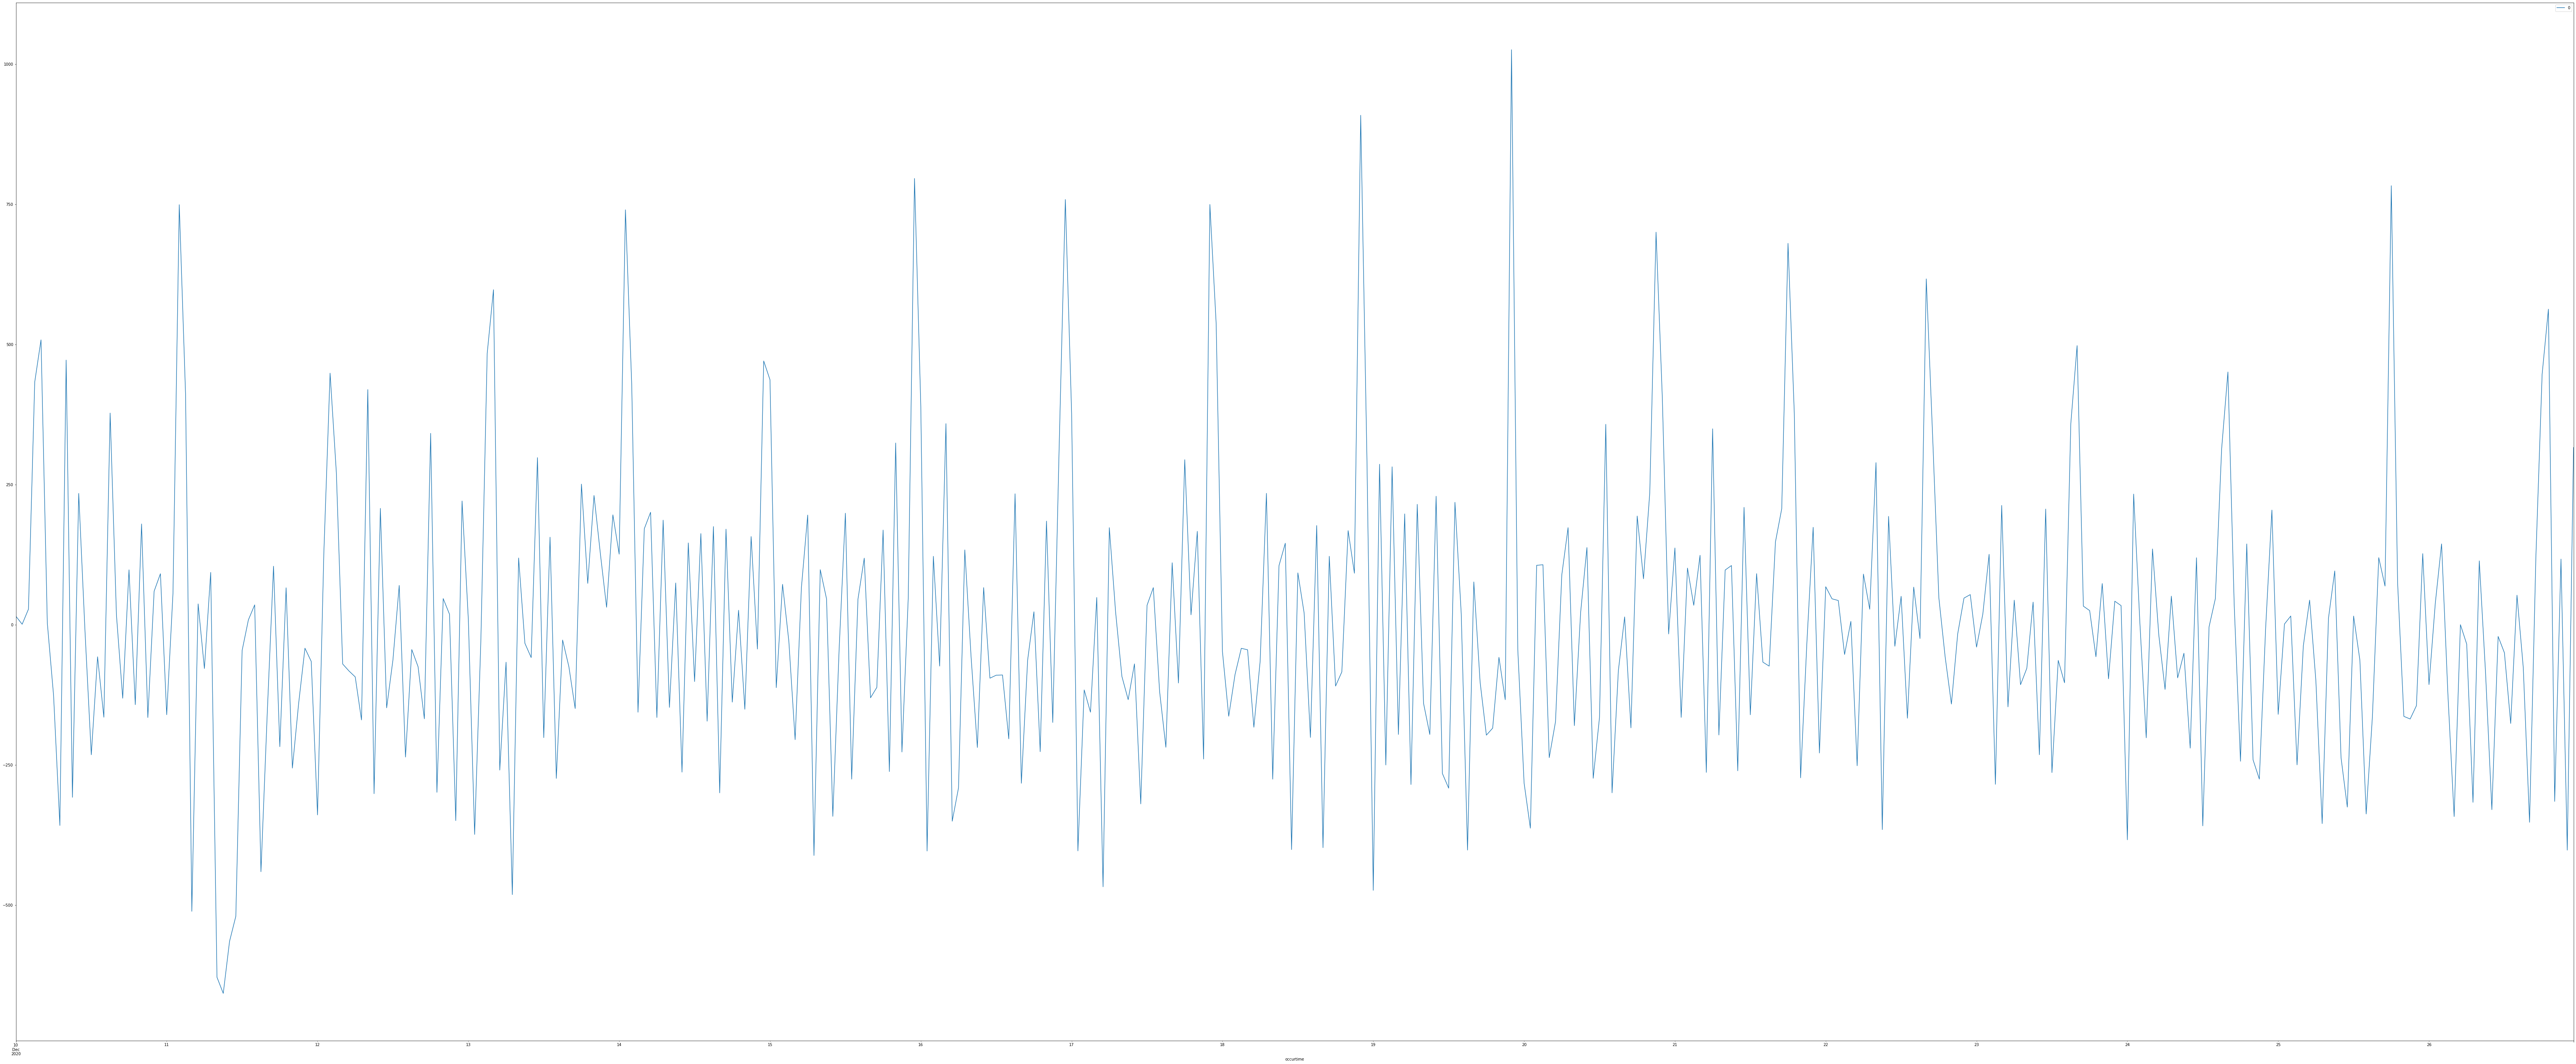

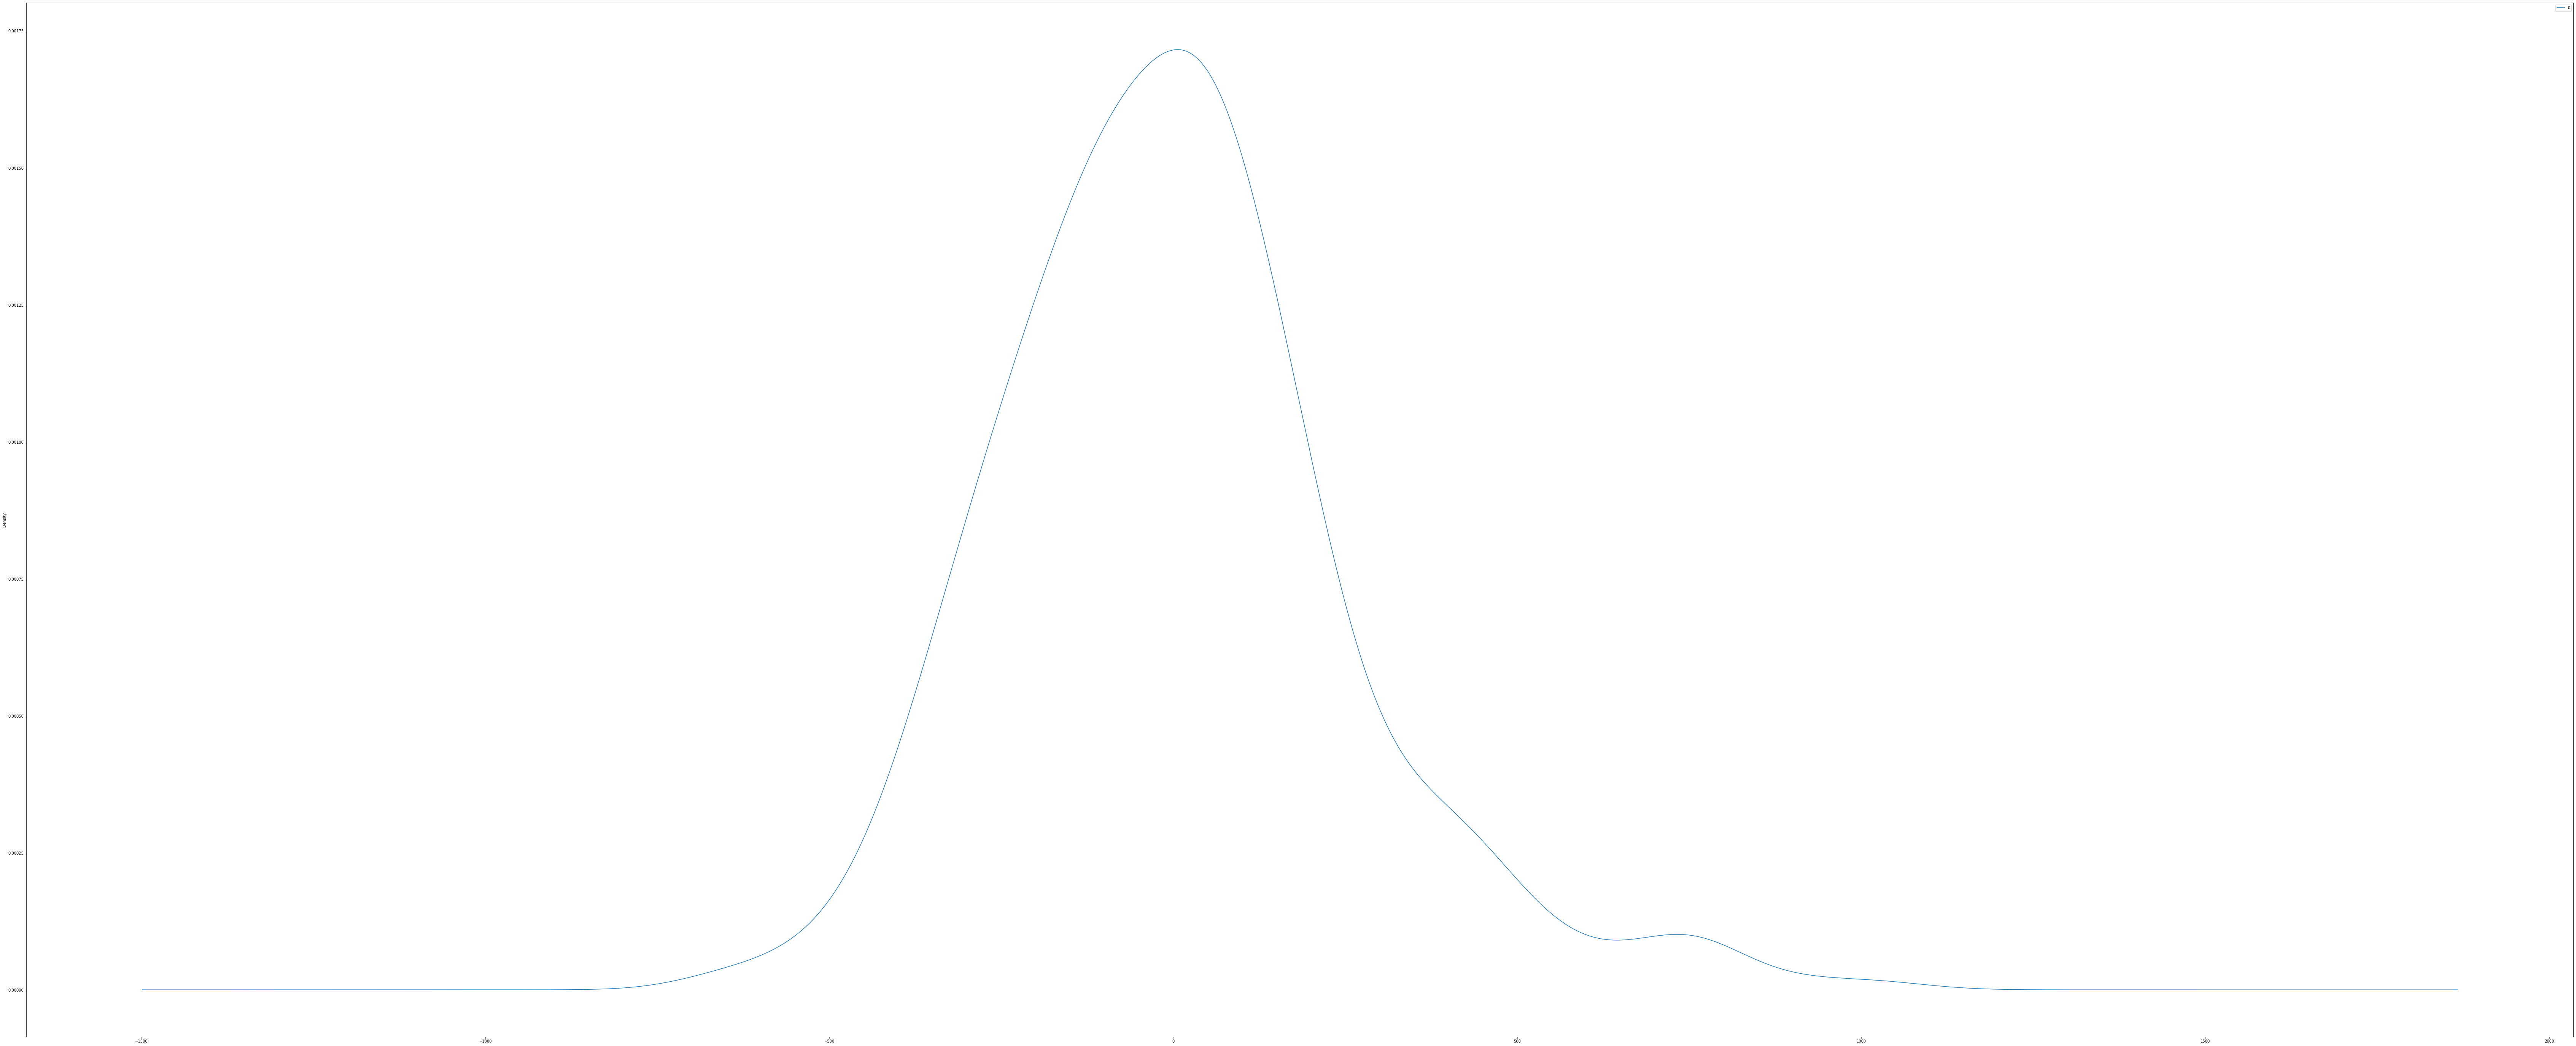

                 0
count   408.000000
mean      0.092805
std     251.941947
min    -657.579507
25%    -165.414323
50%     -14.275012
75%     125.541140
max    1025.463804


In [31]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
import statsmodels
from matplotlib import pyplot
from pmdarima import auto_arima,arima

# load dataset
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
series = read_csv('myfridge-hrs.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('H')
# fit model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(4, 0, 0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=915.821063, expected=651.120000
predicted=802.629072, expected=1149.760000
predicted=954.337946, expected=755.040000
predicted=825.893608, expected=923.680000
predicted=916.264301, expected=1016.880000
predicted=888.963131, expected=628.000000
predicted=815.040342, expected=1017.760000
predicted=907.879111, expected=745.120000
predicted=810.391912, expected=902.560000
predicted=903.613610, expected=834.400000
predicted=839.752053, expected=765.760000
predicted=848.202487, expected=992.880000
predicted=896.372954, expected=1106.240000
predicted=947.937983, expected=1631.340000
predicted=1146.779735, expected=1520.240000
predicted=1140.059257, expected=842.240000
predicted=925.049451, expected=864.000000
predicted=838.130068, expected=991.680000
predicted=853.678668, expected=617.200000
predicted=799.644308, expected=861.040000
predicted=865.526597, expected=904.560000
predicted=855.489494, expected=901.520000
predicted=909.106779, expected=850.480000
predicted=871.726985, expe

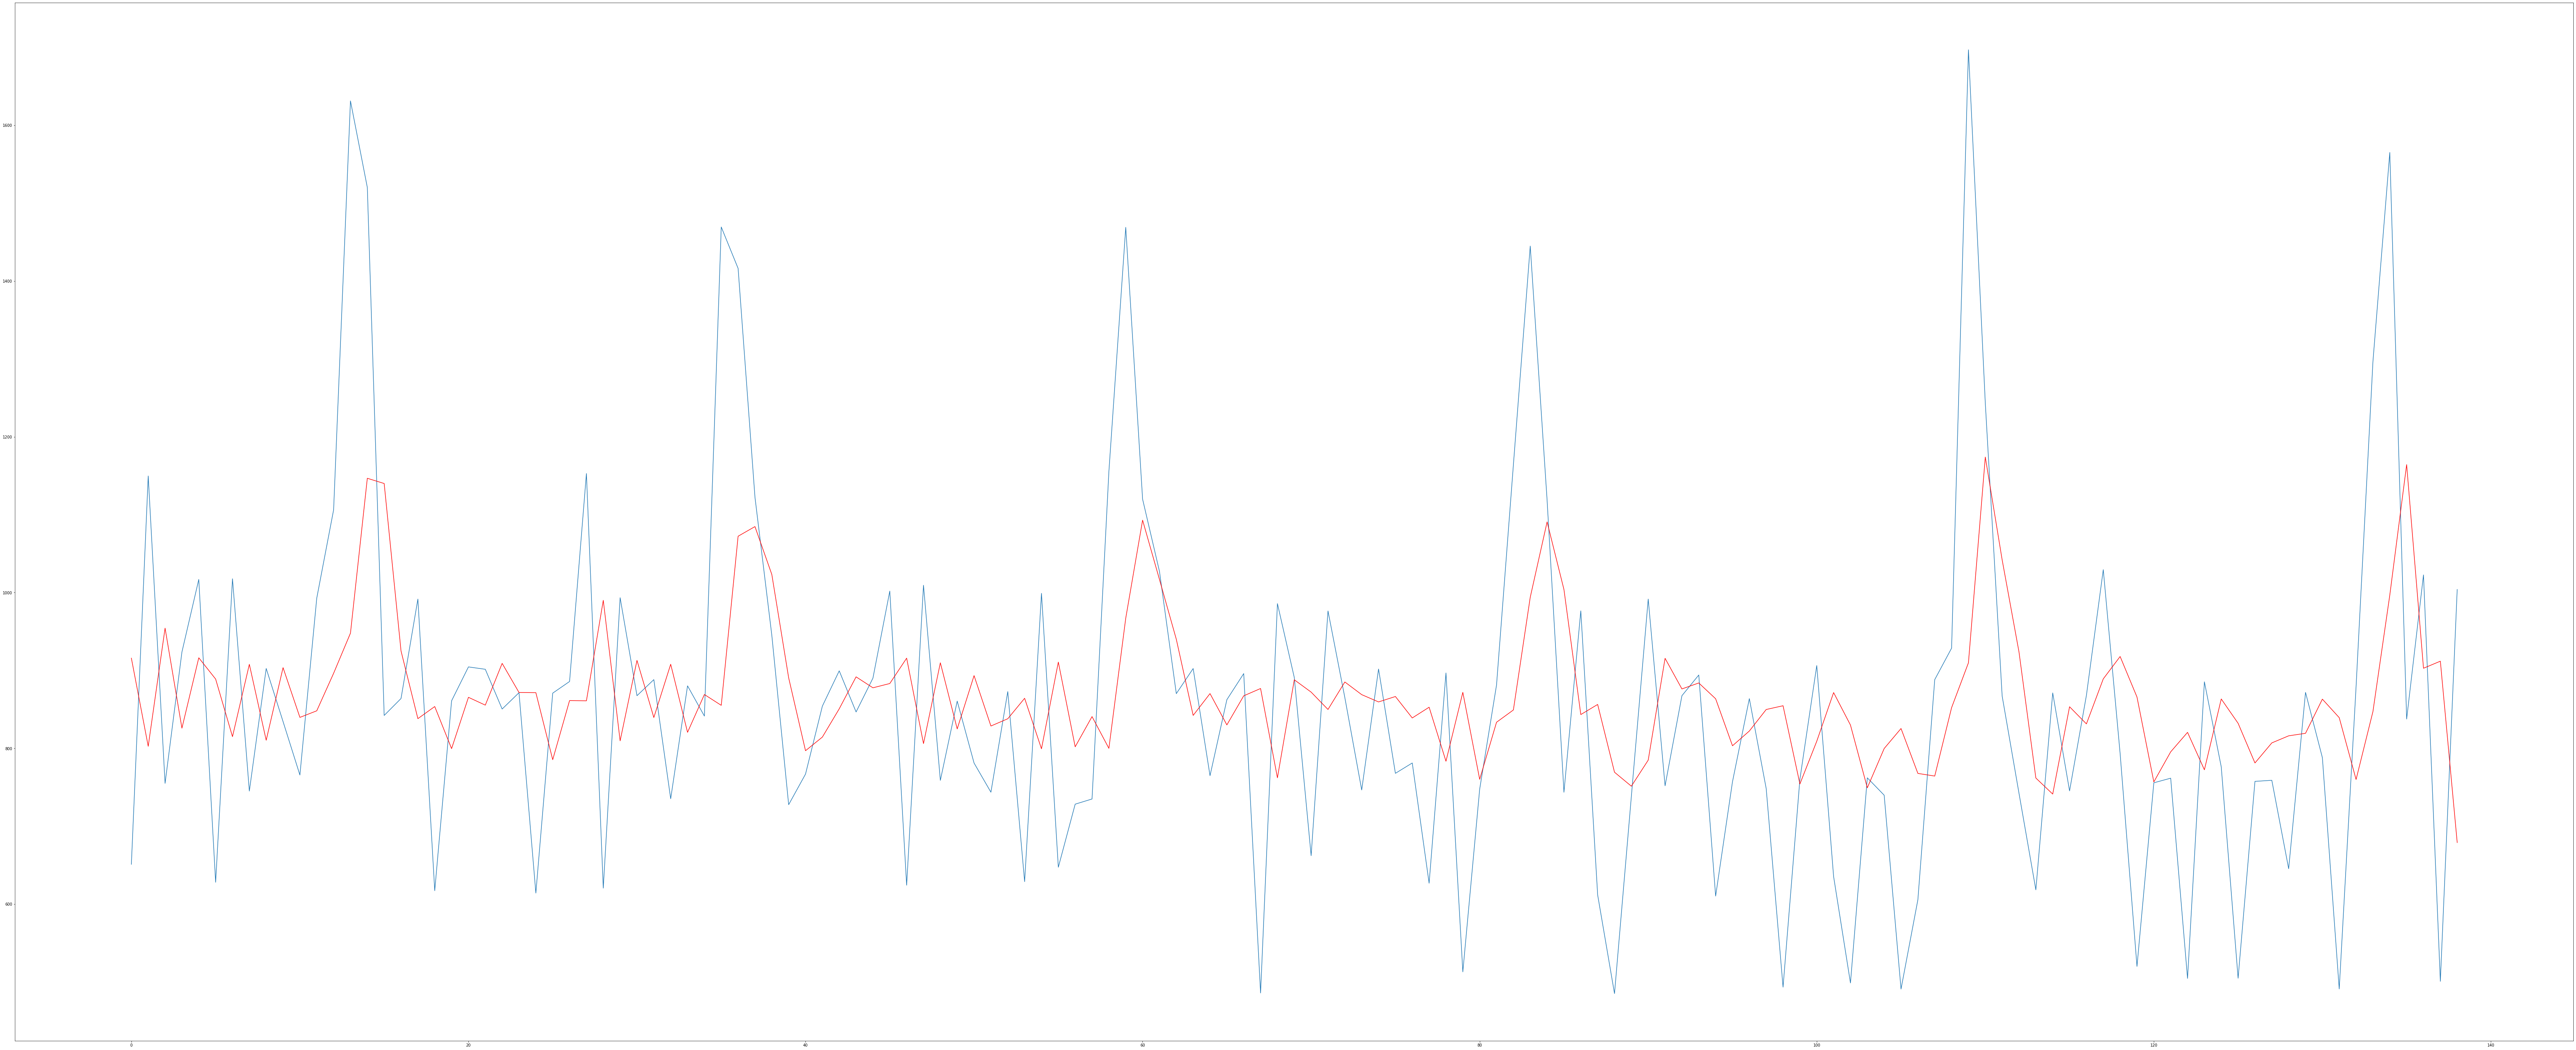

In [32]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
series = read_csv('myfridge-hrs.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('H')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4, 0, 0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

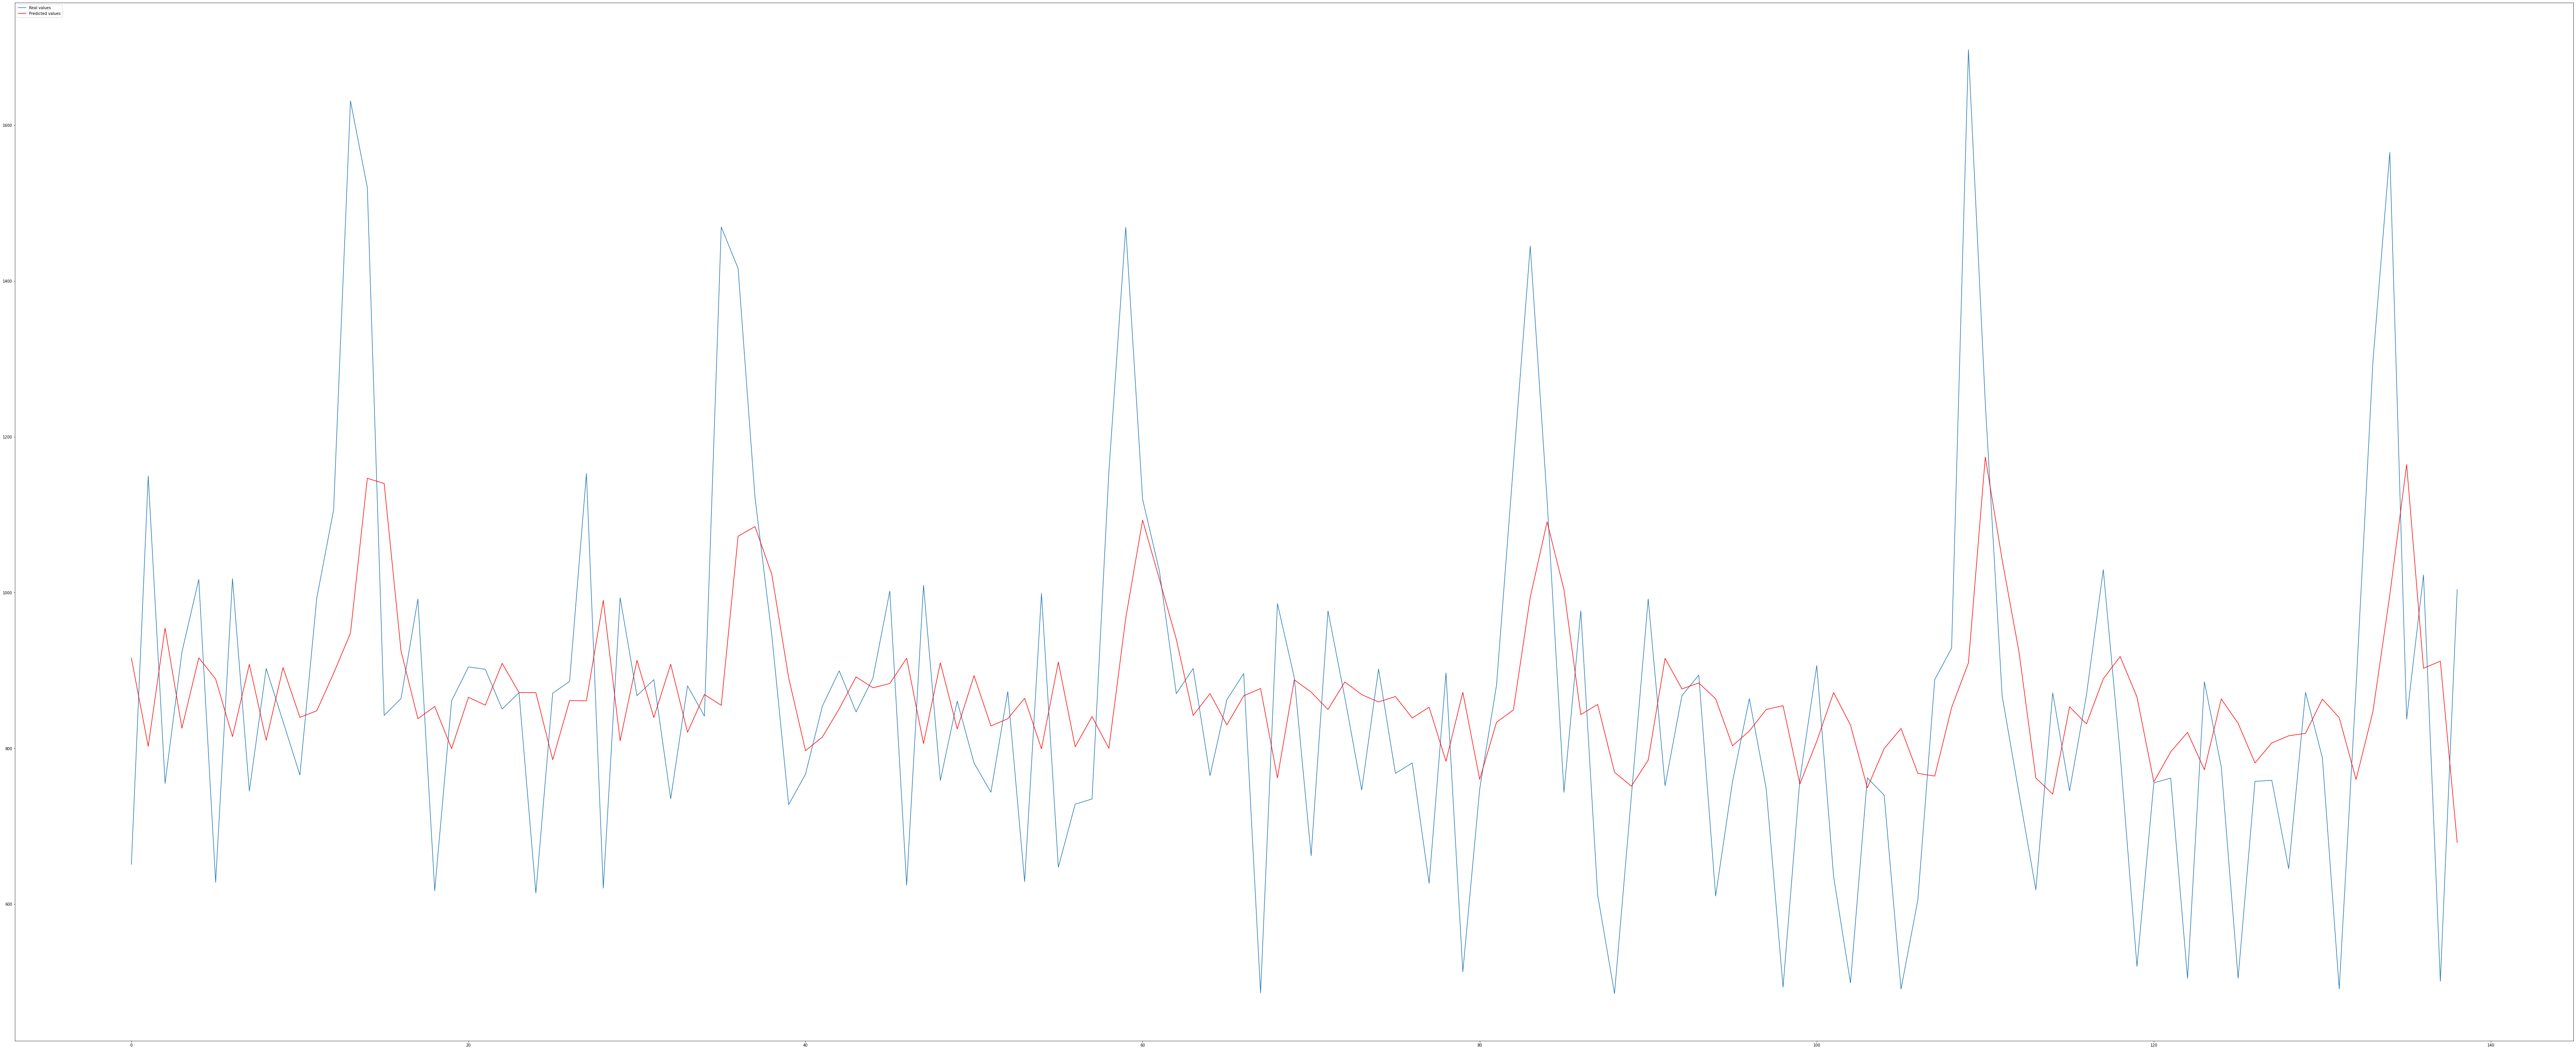

In [33]:
pyplot.rcParams["figure.figsize"] = (120,50)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Real values", "Predicted values"], loc="upper left")
pyplot.show()

In [ ]:
outliers